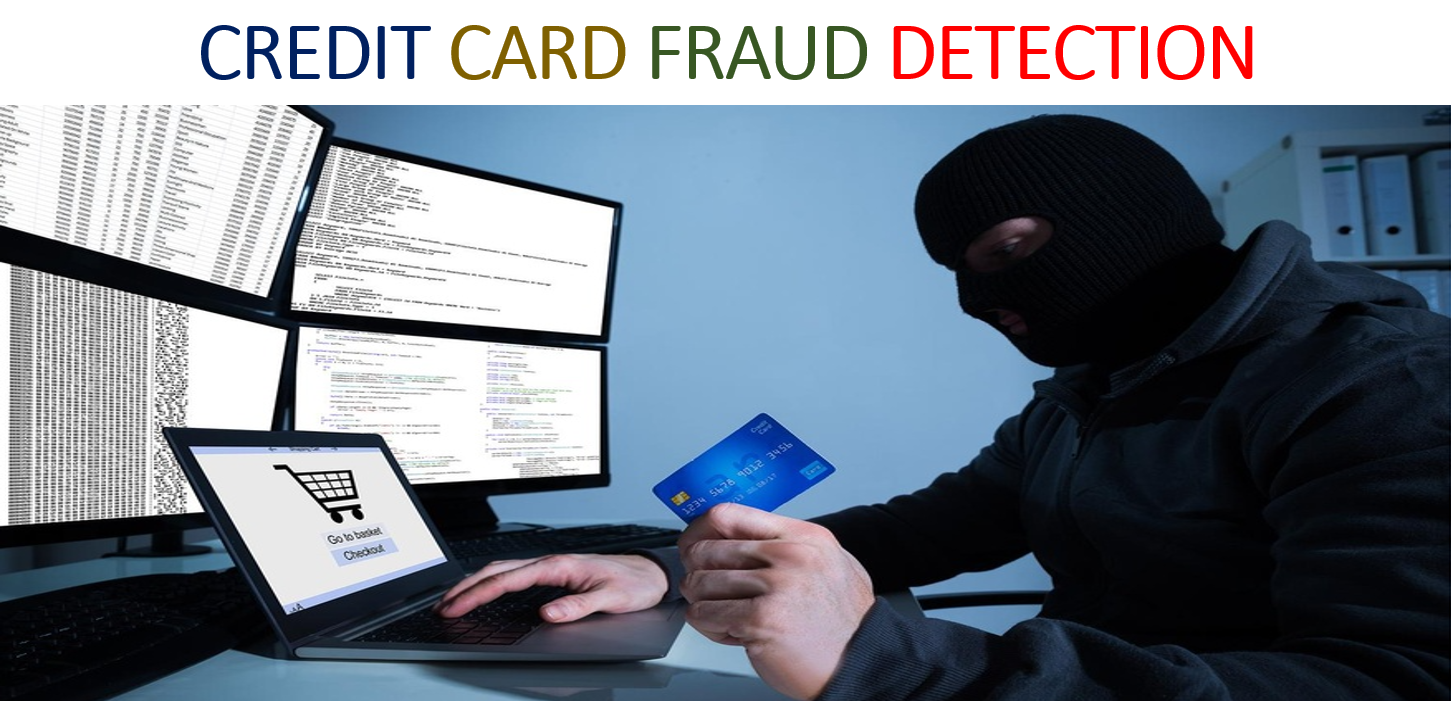

**Our approach for this project is as follow :**  


1.   **Loading of library packages**

2.   **Data Wrangling** 
  * Data Loading
  * Data Cleaning
  * Data Description
  * Check that the data is unbalanced

3.  **Exploratory Data Analysis** 
  * Explore relationship between features of our data 
  * Anomalies and Outliers visualization using Boxplots
  * Other data visualization

4. **Building the Auto-encoder neural network for Dimension Reduction**
  * Separating the dependent and independent variables
  * Building a utility function to plot the data
  * Visualizing the original data
  * Auto-encoder neural network
  * Defining and Training the Auto-encoder
  * Keeping the encoder part of the Auto-encoder to encode data and display the reduced data
  
5. **Data preparation for Model Building**
  * Split data into testing and training datasets
  * Balancing the data
    - Oversampling technique like SMOTE (data1)
    - Undersampling technique like NearMiss (data2)

6. **Modeling**
  * Fit Models with training data1 and training data2 using:
    - Logistic Regression
    - SVM
    - GaussianNB 
    - Random Forest 
    - Decision Tree
    - XGBoost
    - AdaBoost
    - Deep Neural Network
    - CatBoost
    -	Ensemble model using voting classifier
  * Find the most important feature 
  * Review Models Outcomes with test data1 and test data2

7. **Compare our models with the one previously done in the five articles we selected.**

 







---



# **I-PROPOSAL**

---





In [ ]:
!pip install -U imbalanced-learn
!pip uninstall plotly && python -m pip install plotly
!pip install tensorflow
!pip install Keras
!pip install scikit-plot

Requirement already up-to-date: imbalanced-learn in c:\users\ds07\anaconda3\lib\site-packages (0.8.1)


In [ ]:
!pip uninstall plotly && python -m pip install plotly


In [ ]:
!pip install tensorflow


In [ ]:
!pip install Keras

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install delayed

There are millions of people all over the world who are victims of credit card fraud every year, and with that comes a lot of money lost. According to an article published by CNBC in January 2021, credit card fraud will increase due to the COVID 19 pandemic [1]. The presence of COVID 19 has increased online shopping, which gives the opportunity for cyber criminals or scammers to operate more and better than before [2]. If we come to believe the AITE group, 47% of Americans experienced financial identity theft in 2020 and losses from identity theft cases cost 502.5 billion dollars in 2019 and increased 42 percent to $712.4 billion in 2020 [3]. Being able to implement another technique for credit card fraud detection and compare it with other previous models will help us discover if we can still improve the performance metric in order to have a better fraud detection model.

The dataset we will be using for this project is in the Kaggle dataset repository [4]. It contains historical data where we have 492 frauds out of 284,807 transactions. The dataset itself is the result of a PCA transformation. In the dataset we have V1, V2,..., V28 which are the principal components obtained with PCA, “Time”, “Amount” and “Class”. Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning.  Feature 'Class' is the dependent variable with value 1 if there is fraud and 0 otherwise.

The objective of this project is to find out if the credit card fraud detection will increase his performance if we apply dimensionality reduction with PCA to the data (even though we are aware that the data itself is the reduced form through PCA of the original data) and then apply Undersampling technique like Near Miss and Oversampling technique like SMOTE (Synthetic Minority Oversampling Technique) to balance the reduced dataset. Finally, we will apply ten different machine Learning techniques to the reduced and balanced dataset and compare the result with those that have been done previously by other Data Scientists.



##




# **II-IMPORT LIBRARY**

---



In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.manifold import TSNE
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scikitplot.metrics import plot_roc_curve

# **III-DATA WRANGLING**

---



**1- Data Loading**

In [2]:
df=pd.read_csv('creditcard.csv',encoding='ISO-8859-1')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.shape

(284807, 31)

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

**2-Data Cleaning**

Let us check if there are missing data



In [6]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

Empty DataFrame
Columns: [percent]
Index: []

We can see that there are no missing data in this dataset. 

Now let us check if there duplicate in this dataset

In [7]:
duplicate=df[df.duplicated()]
duplicate

Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  ...       V21       V22       V23  \
33      0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
35      0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
113    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
114    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
115    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
...          ...       ...       ...  ...       ...       ...       ...   
282987 -0.881302  1.081750  1.022928  ... -0.524067 -1.337510  0.473943   
283483 -0.303778  0.884953  0.054065  ...  0.287217  0.947825 -0.218773   
283485 -0.282535  0.880654  0.052808  ...  0.284205  0.949659 -0.216949   
284191 -0.667233  2.309700 -1.639306  ...  0.391483  0.266536 -0.079853   
284193 -0.745886  2.325616 -1.634651  ...  0.402639  0.259746 -0.086606   

             V24       V25       V26       V27       V28  Amount  Class  
33      0.001031  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
35      0.000753  0.098117 -0.553471 -0.078306  0.025427    1.77      0  
113    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
114    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
115    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
...          ...       ...       ...       ...       ...     ...    ...  
282987  0.616683 -0.283548 -1.084843  0.073133 -0.036020   11.99      0  
283483  0.082926  0.044127  0.639270  0.213565  0.119251    6.82      0  
283485  0.083250  0.044944  0.639933  0.219432  0.116772   11.93      0  
284191 -0.096395  0.086719 -0.451128 -1.183743 -0.222200   55.66      0  
284193 -0.097597  0.083693 -0.453584 -1.205466 -0.213020   36.74      0  

[1081 rows x 31 columns]

We can see that there are 1081 duplicate rows.

We can check how many fraudulent and non fraudulent rows are duplicated

In [8]:
duplicate.Class.value_counts()

0    1062
1      19
Name: Class, dtype: int64

Let us therefore remove the duplicate rows

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(283726, 31)

In [11]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

**3-Data Description**

In [12]:
df.describe().T

count          mean           std         min           25%  \
Time    283726.0  94811.077600  47481.047891    0.000000  54204.750000   
V1      283726.0      0.005917      1.948026  -56.407510     -0.915951   
V2      283726.0     -0.004135      1.646703  -72.715728     -0.600321   
V3      283726.0      0.001613      1.508682  -48.325589     -0.889682   
V4      283726.0     -0.002966      1.414184   -5.683171     -0.850134   
V5      283726.0      0.001828      1.377008 -113.743307     -0.689830   
V6      283726.0     -0.001139      1.331931  -26.160506     -0.769031   
V7      283726.0      0.001801      1.227664  -43.557242     -0.552509   
V8      283726.0     -0.000854      1.179054  -73.216718     -0.208828   
V9      283726.0     -0.001596      1.095492  -13.434066     -0.644221   
V10     283726.0     -0.001441      1.076407  -24.588262     -0.535578   
V11     283726.0      0.000202      1.018720   -4.797473     -0.761649   
V12     283726.0     -0.000715      0.994674  -18.683715     -0.406198   
V13     283726.0      0.000603      0.995430   -5.791881     -0.647862   
V14     283726.0      0.000252      0.952215  -19.214325     -0.425732   
V15     283726.0      0.001043      0.914894   -4.498945     -0.581452   
V16     283726.0      0.001162      0.873696  -14.129855     -0.466860   
V17     283726.0      0.000170      0.842507  -25.162799     -0.483928   
V18     283726.0      0.001515      0.837378   -9.498746     -0.498014   
V19     283726.0     -0.000264      0.813379   -7.213527     -0.456289   
V20     283726.0      0.000187      0.769984  -54.497720     -0.211469   
V21     283726.0     -0.000371      0.723909  -34.830382     -0.228305   
V22     283726.0     -0.000015      0.724550  -10.933144     -0.542700   
V23     283726.0      0.000198      0.623702  -44.807735     -0.161703   
V24     283726.0      0.000214      0.605627   -2.836627     -0.354453   
V25     283726.0     -0.000232      0.521220  -10.295397     -0.317485   
V26     283726.0      0.000149      0.482053   -2.604551     -0.326763   
V27     283726.0      0.001763      0.395744  -22.565679     -0.070641   
V28     283726.0      0.000547      0.328027  -15.430084     -0.052818   
Amount  283726.0     88.472687    250.399437    0.000000      5.600000   
Class   283726.0      0.001667      0.040796    0.000000      0.000000   

                 50%            75%            max  
Time    84692.500000  139298.000000  172792.000000  
V1          0.020384       1.316068       2.454930  
V2          0.063949       0.800283      22.057729  
V3          0.179963       1.026960       9.382558  
V4         -0.022248       0.739647      16.875344  
V5         -0.053468       0.612218      34.801666  
V6         -0.275168       0.396792      73.301626  
V7          0.040859       0.570474     120.589494  
V8          0.021898       0.325704      20.007208  
V9         -0.052596       0.595977      15.594995  
V10        -0.093237       0.453619      23.745136  
V11        -0.032306       0.739579      12.018913  
V12         0.139072       0.616976       7.848392  
V13        -0.012927       0.663178       7.126883  
V14         0.050209       0.492336      10.526766  
V15         0.049299       0.650104       8.877742  
V16         0.067119       0.523512      17.315112  
V17        -0.065867       0.398972       9.253526  
V18        -0.002142       0.501956       5.041069  
V19         0.003367       0.458508       5.591971  
V20        -0.062353       0.133207      39.420904  
V21        -0.029441       0.186194      27.202839  
V22         0.006675       0.528245      10.503090  
V23        -0.011159       0.147748      22.528412  
V24         0.041016       0.439738       4.584549  
V25         0.016278       0.350667       7.519589  
V26        -0.052172       0.240261       3.517346  
V27         0.001479       0.091208      31.612198  
V28         0.011288       0.078276      33.847808  
Amount     22.000000      77.510000   25691.160000  

**4-Data unbalance**

In [13]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

The data is extremely unbalanced with 283,253 non fraud transactions data and 473  fraud transactions data.
Let us draw a Pie Chart to visualize how unbalanced the data is.

Text(0, 0.5, 'Frequency')

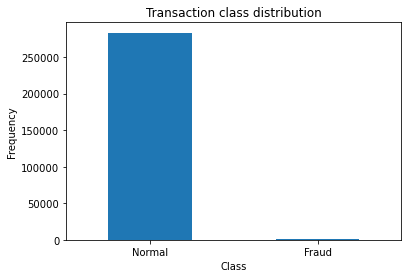

In [14]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

We can see that 99.8% of the data is not fraud and 0.2% is fraud.

# 

#**IV-EXPLORATORY DATA ANALYSIS**

---



**1-Explore relationship between features of our data**

Let us create a Pearson correlation heatmap.

In [15]:
#Calculate the correlation coefficients
plt.figure(figsize=(15,10))
corr =df.corr(method='pearson')
#plot it in the next line
#sns.heatmap(df.corr(), vmax=1, square=True,cmap='viridis')
corr.style.background_gradient(cmap='viridis')

<Figure size 1080x720 with 0 Axes>

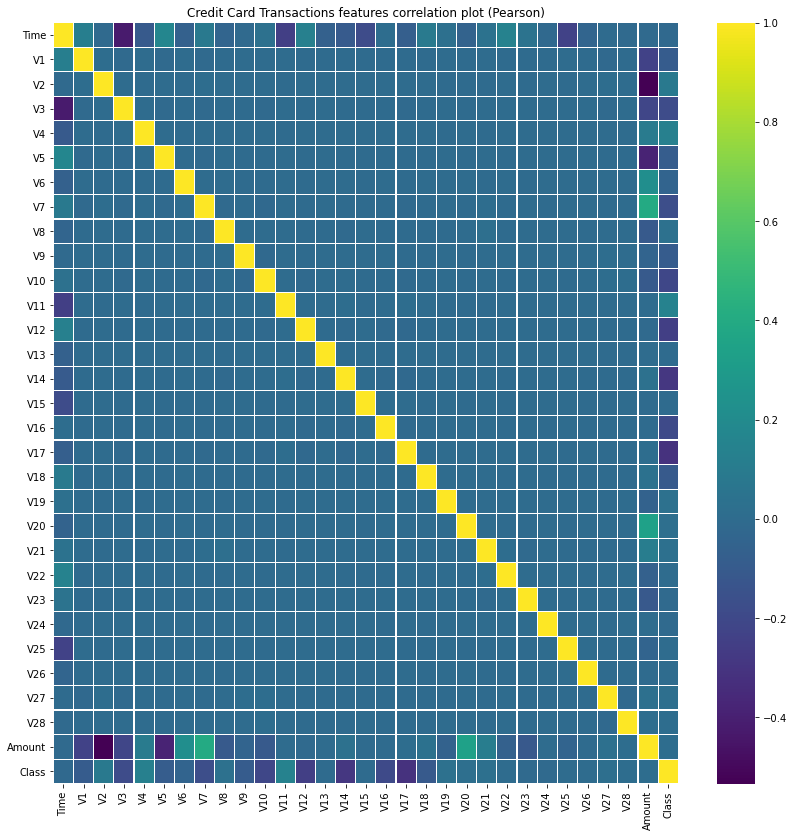

In [16]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr =df.corr(method='pearson')
p=corr.style.background_gradient(cmap='viridis')
sns.heatmap(corr,xticklabels=p.columns,yticklabels=corr.columns,linewidths=.1,cmap="viridis")
plt.show()

Let us create a correlation matrix that excludes my response variable 'Class'

In [17]:
corr_matrix=df.drop(['Class'], axis=1).corr().abs()
corr_matrix

Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927  0.010556  0.422054  0.105845  0.173223  0.063279   
V1      0.117927  1.000000  0.006875  0.008112  0.002257  0.007036  0.000413   
V2      0.010556  0.006875  1.000000  0.005278  0.001495  0.005210  0.000594   
V3      0.422054  0.008112  0.005278  1.000000  0.002829  0.006879  0.001511   
V4      0.105845  0.002257  0.001495  0.002829  1.000000  0.001744  0.000880   
V5      0.173223  0.007036  0.005210  0.006879  0.001744  1.000000  0.000938   
V6      0.063279  0.000413  0.000594  0.001511  0.000880  0.000938  1.000000   
V7      0.085335  0.009173  0.007425  0.011721  0.004657  0.008709  0.000436   
V8      0.038203  0.001168  0.002899  0.001815  0.000890  0.001430  0.003036   
V9      0.007861  0.001828  0.000274  0.003579  0.002154  0.001213  0.000734   
V10     0.031068  0.000815  0.000620  0.009632  0.002753  0.006050  0.002180   
V11     0.248536  0.001028  0.000633  0.002339  0.001223  0.000411  0.000211   
V12     0.125500  0.001524  0.002266  0.005900  0.003366  0.002342  0.001185   
V13     0.065958  0.000568  0.000680  0.000113  0.000177  0.000019  0.000397   
V14     0.100316  0.002663  0.002711  0.003027  0.002801  0.001000  0.000184   
V15     0.184392  0.000602  0.001538  0.001230  0.000572  0.001171  0.000470   
V16     0.011286  0.003345  0.004013  0.004430  0.003346  0.002373  0.000122   
V17     0.073819  0.003491  0.003244  0.008159  0.003655  0.004466  0.001716   
V18     0.090305  0.003535  0.002477  0.003495  0.002325  0.002685  0.000541   
V19     0.029537  0.000919  0.000358  0.000016  0.000560  0.000436  0.000106   
V20     0.051022  0.001393  0.001287  0.002269  0.000318  0.001185  0.000181   
V21     0.045913  0.002818  0.004897  0.003500  0.001034  0.001622  0.002134   
V22     0.143727  0.001436  0.001237  0.000275  0.000115  0.000559  0.001104   
V23     0.051474  0.001330  0.003855  0.000449  0.000732  0.001183  0.000755   
V24     0.015954  0.000723  0.000701  0.000072  0.000120  0.000198  0.001202   
V25     0.233262  0.000222  0.001569  0.000425  0.000162  0.000069  0.000697   
V26     0.041818  0.000684  0.000253  0.000094  0.000777  0.000390  0.000028   
V27     0.005171  0.015706  0.007555  0.007051  0.001322  0.005798  0.000289   
V28     0.009305  0.004861  0.001611  0.000134  0.000231  0.000820  0.000925   
Amount  0.010559  0.230105  0.533428  0.212410  0.099514  0.387685  0.216389   

              V7        V8        V9  ...       V20       V21       V22  \
Time    0.085335  0.038203  0.007861  ...  0.051022  0.045913  0.143727   
V1      0.009173  0.001168  0.001828  ...  0.001393  0.002818  0.001436   
V2      0.007425  0.002899  0.000274  ...  0.001287  0.004897  0.001237   
V3      0.011721  0.001815  0.003579  ...  0.002269  0.003500  0.000275   
V4      0.004657  0.000890  0.002154  ...  0.000318  0.001034  0.000115   
V5      0.008709  0.001430  0.001213  ...  0.001185  0.001622  0.000559   
V6      0.000436  0.003036  0.000734  ...  0.000181  0.002134  0.001104   
V7      1.000000  0.006419  0.004921  ...  0.001192  0.009010  0.002280   
V8      0.006419  1.000000  0.001038  ...  0.000271  0.018892  0.006156   
V9      0.004921  0.001038  1.000000  ...  0.001838  0.000679  0.000785   
V10     0.013617  0.000481  0.012613  ...  0.004448  0.003777  0.000481   
V11     0.002454  0.004688  0.000217  ...  0.000989  0.002760  0.000150   
V12     0.006153  0.004414  0.002385  ...  0.001169  0.003285  0.000151   
V13     0.000170  0.001381  0.000745  ...  0.000379  0.000522  0.000016   
V14     0.003816  0.008387  0.001981  ...  0.002726  0.005633  0.001906   
V15     0.001394  0.001044  0.000283  ...  0.000754  0.000271  0.001197   
V16     0.005944  0.004376  0.000086  ...  0.001067  0.004326  0.000820   
V17     0.008794  0.005576  0.002318  ...  0.001518  0.003560  0.000162   
V18     0.004279  0.001323  0.000373  ...  0.000245  0.001629  0.000533   
V19     0.000846  0.000626  0.0

Since the correlation matrix actually contains the same information twice, let us instead plot the upper triangle.

In [18]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

Time        V1        V2        V3        V4        V5        V6  \
Time     NaN  0.117927  0.010556  0.422054  0.105845  0.173223  0.063279   
V1       NaN       NaN  0.006875  0.008112  0.002257  0.007036  0.000413   
V2       NaN       NaN       NaN  0.005278  0.001495  0.005210  0.000594   
V3       NaN       NaN       NaN       NaN  0.002829  0.006879  0.001511   
V4       NaN       NaN       NaN       NaN       NaN  0.001744  0.000880   
V5       NaN       NaN       NaN       NaN       NaN       NaN  0.000938   
V6       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V7       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V8       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V9       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V10      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V11      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V12      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V13      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V14      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V15      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V16      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V17      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V18      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V19      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V20      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V21      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V22      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V23      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V24      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V25      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V26      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V27      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V28      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Amount   NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              V7        V8        V9  ...       V20       V21       V22  \
Time    0.085335  0.038203  0.007861  ...  0.051022  0.045913  0.143727   
V1      0.009173  0.001168  0.001828  ...  0.001393  0.002818  0.001436   
V2      0.007425  0.002899  0.000274  ...  0.001287  0.004897  0.001237   
V3      0.011721  0.001815  0.003579  ...  0.002269  0.003500  0.000275   
V4      0.004657  0.000890  0.002154  ...  0.000318  0.001034  0.000115   
V5      0.008709  0.001430  0.001213  ...  0.001185  0.001622  0.000559   
V6      0.000436  0.003036  0.000734  ...  0.000181  0.002134  0.001104   
V7           NaN  0.006419  0.004921  ...  0.001192  0.009010  0.002280   
V8           NaN       NaN  0.001038  ...  0.000271  0.018892  0.006156   
V9           NaN       NaN       NaN  ...  0.001838  0.000679  0.000785   
V10          NaN       NaN       NaN  ...  0.004448  0.003777  0.000481   
V11          NaN       NaN       NaN  ...  0.000989  0.002760  0.000150   
V12          NaN       NaN       NaN  ...  0.001169  0.003285  0.000151   
V13          NaN       NaN       NaN  ...  0.000379  0.000522  0.000016   
V14          NaN       NaN       NaN  ...  0.002726  0.005633  0.001906   
V15          NaN       NaN       NaN  ...  0.000754  0.000271  0.001197   
V16          NaN       NaN       NaN  ...  0.001067  0.004326  0.000820   
V17          NaN       NaN       NaN  ...  0.001518  0.003560  0.000162   
V18          NaN       NaN       NaN  ...  0.000245  0.001629  0.000533   
V19          NaN       NaN       NaN  ...  0.000269  0.000244  0.001342   
V20          NaN       NaN       NaN  ...       NaN  0.005372  0.001617   
V

Let us find the index of feature columns with a correlation greater than 0.90. If we have such variables, we will delete one from our dataset and keep the other. We are creating a variable called to_drop that will contain such columns.

In [19]:
to_drop=[column for column in upper.columns if any(upper[column]>0.90)]
to_drop

[]

We can therefore say that there no high correlation between variable in our dataset.

**2-Anomalies and Outliers visualization using Boxplots**

Let us see if there are anomaly in our dataset that we can remove

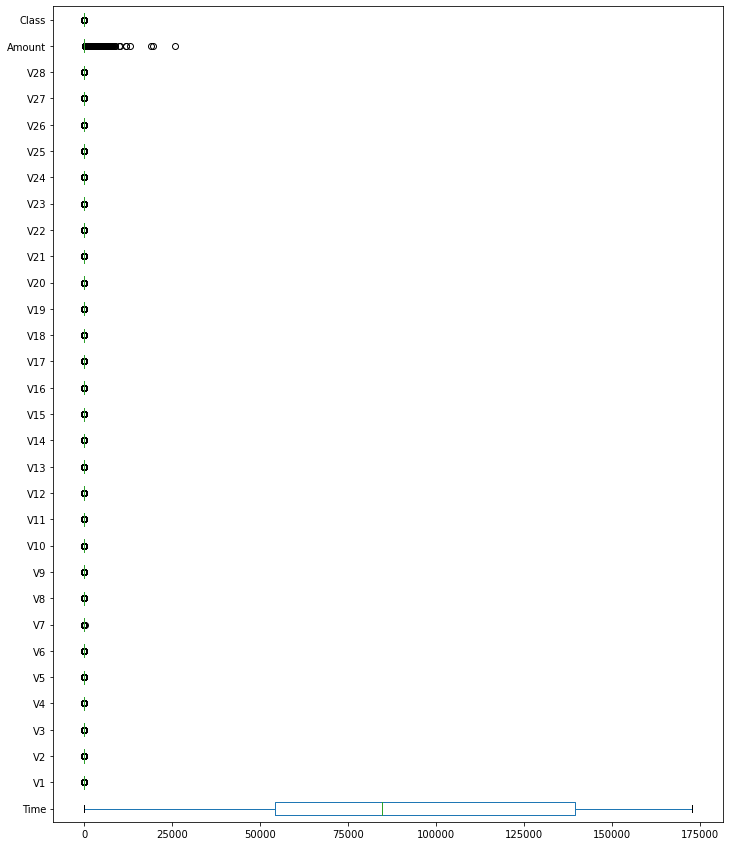

In [20]:
boxplot=df.boxplot(grid=False, vert=False, fontsize=10, figsize=(12,15))

It looks like there are some anomaly in the feature "Amount". Let us try to remove those anomaly.

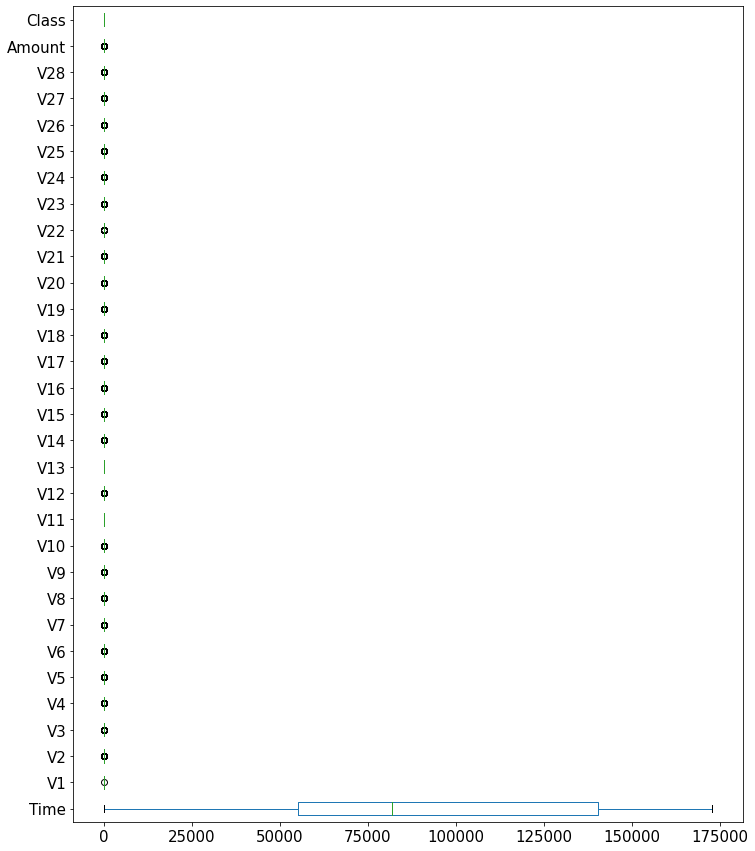

In [21]:
# Let's get the Interquartile range, or IQR. This is equal to Q3 - Q1. 
# First, let's use the quantile() method to get the first quartile, and store it in a variable called Q1.
# We'll want to plug 0.25 into the quantile method. 
Q1 = df.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3=df.quantile(0.75)
# Now calculate the IQR, storing it in a variable called IQR.
IQR=Q3-Q1
# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)].
DF=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 

# We now want to make a boxplot of this new dataframe dfno. 
p= DF.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [22]:
DF.shape

(145938, 31)

In [23]:
DF.Class.value_counts()

0    145938
Name: Class, dtype: int64

This is not good, because If we use this method to remove outlier, we will remove all the fraud transaction. But at least this confirm the fact the fraud transaction are outliers.We will keep our old data.

**3-Other data visualization**

Let us plot the number of transaction per second for fraud and normal transaction

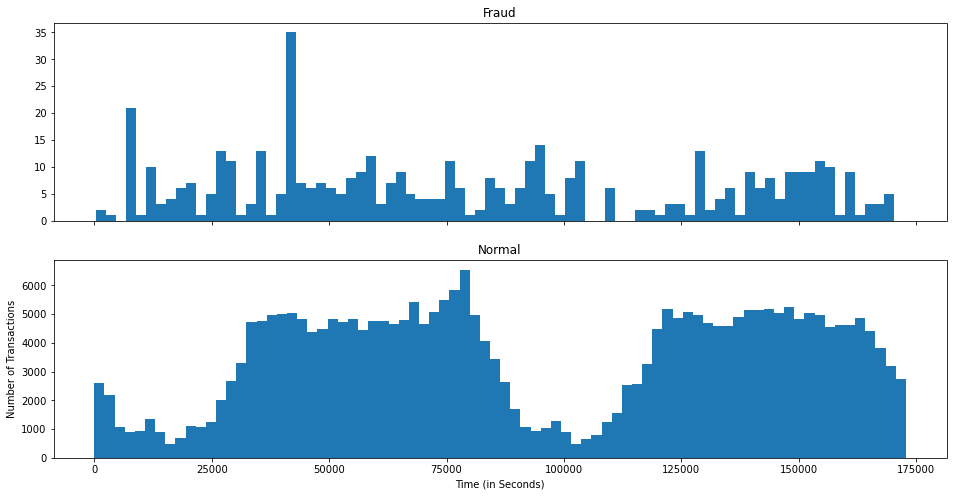

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,8))

ax1.hist(df.Time[df.Class == 1], bins = 80)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = 80)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [25]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

We can see that fraud transaction are more distributed over time than normal transaction.

In [26]:
#pplots=sns.pairplot(df)
#pplots

# **V-BUILDING THE AUTO-ENCODER NEURAL NETWORK FOR DIMENSION REDUCTION**

**1-Normalise the data**

In [27]:
scaler = StandardScaler()
a=df.drop(columns='Class')
for i in a.columns:
  df[i]=scaler.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996823 -0.701082 -0.041687  1.680101  0.976623 -0.247020  0.348012   
1 -1.996823  0.608792  0.164138  0.109279  0.318998  0.042258 -0.060980   
2 -1.996802 -0.700336 -0.811337  1.174270  0.270648 -0.366756  1.352655   
3 -1.996802 -0.499064 -0.109972  1.187383 -0.608355 -0.008814  0.937245   
4 -1.996781 -0.597606  0.535539  1.025470  0.287092 -0.297036  0.072873   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.193700  0.084434  0.333534  ... -0.024777  0.383483 -0.177444  0.110157   
1 -0.065656  0.072903 -0.231703  ... -0.311372 -0.881454  0.162081 -0.561503   
2  0.643223  0.210788 -1.381169  ...  0.343094  1.065068  1.457772 -1.138484   
3  0.192079  0.320843 -1.264664  ... -0.149093  0.007299 -0.305465 -1.941446   
4  0.481517 -0.228725  0.747917  ... -0.012516  1.101780 -0.220709  0.232904   

        V25       V26       V27       V28    Amount  Class  
0  0.247059 -0.392622  0.333033 -0.065850  0.244200      0  
1  0.321175  0.260854 -0.027154  0.043219 -0.342584      0  
2 -0.628161 -0.288861 -0.144325 -0.183824  1.158900      0  
3  1.242487 -0.460694  0.154039  0.185687  0.139886      0  
4 -0.394800  1.041677  0.550001  0.654234 -0.073813      0  

[5 rows x 31 columns]

**2-Separating the dependent and independent variables**

In [29]:
fraud = df[df['Class']== 1]
normal = df[df['Class']== 0].sample(10000)  
# Reducing the dataset because of machinery constraints
data = normal.append(fraud).reset_index(drop = True)
X=data.drop(columns='Class')
y=data['Class']

**3-Building a function to plot the data**

In [30]:
def data_plot(X,y):
    # Setting the plotting background
    sns.set(style ="whitegrid")	
    tsne = TSNE(n_components = 2, random_state = 0) 
    # Reducing the dimensionality of the data
    X_transformed = tsne.fit_transform(X)
    plt.figure(figsize =(12, 8))
    # Building the scatter plot
    plt.scatter(X_transformed[np.where(y == 0), 0],
                X_transformed[np.where(y == 0), 1],
                marker ='o', color ='y', linewidth ='1',
                alpha = 0.8, label ='Normal')
    plt.scatter(X_transformed[np.where(y == 1), 0],
                X_transformed[np.where(y == 1), 1],
                marker ='o', color ='k', linewidth ='1',
                alpha = 0.8, label ='Fraud')
    # Specifying the location of the legend
    plt.legend(loc ='best')
    
    # Set the y and x axix
    plt.ylabel("Dependent Variable")
    plt.xlabel("Independent Variable")

    # Plotting the reduced data
    plt.show()


In [31]:
#data_plot(X,y)

**4-Auto-encoder neural network**

Here we have defined the autoencoder model by subclassing the Model class in Tensorflow and we compile the AutoEncoder model with mean square error and adadelta optimization function. We split the data into batches of 16 and we run it for 10 epochs.

In [32]:
X=df.drop(columns='Class')
y=df['Class']

In [33]:
X_normal= X[y == 0]
X_fraud= X[y == 1]

Here we are building an input layer, Encoder network and decoder network

In [34]:
# Building the Input Layer
input_layer = Input(shape =(X.shape[1], ))

# Building the Encoder network
encoded = Dense(100, activation ='tanh', activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation ='tanh', activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation ='tanh', activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation ='tanh', activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation ='relu')(encoded)
# Building the Output Layer
output_layer = Dense(X.shape[1], activation ='relu')(encoded)

**5-Defining and Training the Auto-encoder**

Here we have defined the autoencoder model by subclassing the Model class in Tensorflow and we compile the AutoEncoder model with mean square error and adadelta optimization function. We split the data into batches of 16 and we run it for 10 epochs.

In [35]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adadelta", loss ="mse")

# Training the Auto-encoder network
autoencoder.fit(X_normal, X_normal, batch_size = 16, epochs = 10, shuffle = True, validation_split = 0.20)


Epoch 1/10
14163/14163 [==============================] - 12s 800us/step - loss: 0.9734 - val_loss: 0.9612
Epoch 2/10
14163/14163 [==============================] - 11s 812us/step - loss: 0.9552 - val_loss: 0.9483
Epoch 3/10
14163/14163 [==============================] - 11s 802us/step - loss: 0.9453 - val_loss: 0.9398
Epoch 4/10
14163/14163 [==============================] - 11s 787us/step - loss: 0.9388 - val_loss: 0.9341
Epoch 5/10
14163/14163 [==============================] - 11s 792us/step - loss: 0.9341 - val_loss: 0.9301
Epoch 6/10
14163/14163 [==============================] - 12s 873us/step - loss: 0.9304 - val_loss: 0.9270
Epoch 7/10
14163/14163 [==============================] - 14s 977us/step - loss: 0.9271 - val_loss: 0.9245
Epoch 8/10
14163/14163 [==============================] - 14s 972us/step - loss: 0.9242 - val_loss: 0.9226
Epoch 9/10
14163/14163 [==============================] - 13s 939us/step - loss: 0.9216 - val_loss: 0.9211
Epoch 10/10
14163/14163 [============

In [36]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

**6-Keeping the encoder part of the Auto-encoder to encode data and display the reduced data**

In [37]:
#Retaining the encoder part of the Auto-encoder to encode data
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])

In [38]:
#Encoding the data
# Separating the points encoded by the Auto-encoder as normal and fraud
normal_hidden_rep = hidden_representation.predict(X_normal)
fraud_hidden_rep = hidden_representation.predict(X_fraud)

# Combining the encoded points into a single table
encoded_X = np.append(normal_hidden_rep, fraud_hidden_rep, axis = 0)
y_normal = np.zeros(normal_hidden_rep.shape[0])
y_fraud = np.ones(fraud_hidden_rep.shape[0])
encoded_y = np.append(y_normal, y_fraud)

In [39]:
#See the reduced data
reduced_data=pd.DataFrame(encoded_X)
reduced_data.columns = ['factor_1', 'factor_2', 'factor_3','factor_4', 'factor_5','factor_6', 
                        'factor_7', 'factor_8','factor_9', 'factor_10','factor_11', 'factor_12']
reduced_data['Class']=pd.DataFrame(encoded_y).values
reduced_data

factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  \
0      -0.286957 -0.534418  0.746001 -0.457788  0.750654  0.007023 -0.725058   
1       0.613482 -0.868561  0.331687  0.557418 -0.017523  0.429360 -0.833079   
2       0.771282  0.524875 -0.579974  0.236189  0.480523  0.690222 -0.274624   
3       0.638460 -0.606917 -0.314596  0.400683  0.485704  0.269940 -0.545313   
4      -0.264389 -0.313219  0.794672 -0.414853  0.660599 -0.374242  0.216027   
...          ...       ...       ...       ...       ...       ...       ...   
283721  0.411470 -0.851805 -0.428828  0.800562  0.202222  0.568005  0.132577   
283722  0.711585 -0.862696 -0.372273  0.781056 -0.143827  0.637333 -0.053964   
283723  0.650602 -0.762901 -0.023195  0.661840  0.409070  0.462815  0.005762   
283724  0.499734 -0.779332 -0.374717  0.742006  0.348626  0.614065  0.074250   
283725 -0.316071 -0.363612 -0.121348  0.656006 -0.782258 -0.019831  0.835652   

        factor_8  factor_9  factor_10  factor_11  factor_12  Class  
0       0.436151 -0.085846  -0.529075  -0.620386   0.648498    0.0  
1       0.784614 -0.057734   0.585701  -0.088438   0.508902    0.0  
2       0.270668 -0.555837  -0.654834   0.285677  -0.871670    0.0  
3      -0.190838  0.397313   0.201141  -0.048815  -0.482186    0.0  
4      -0.233003  0.207442  -0.570524  -0.680437   0.067893    0.0  
...          ...       ...        ...        ...        ...    ...  
283721  0.281525  0.496210   0.566075   0.484031  -0.249190    1.0  
283722  0.219400  0.579107   0.820864   0.630283   0.278559    1.0  
283723 -0.230953  0.685812   0.564186   0.514046  -0.045328    1.0  
283724  0.168547  0.540172   0.500718   0.463925   0.164844    1.0  
283725 -0.279245  0.458095   0.837738   0.307035   0.010836    1.0  

[283726 rows x 13 columns]

In [40]:
reduced_data.Class.value_counts()

0.0    283253
1.0       473
Name: Class, dtype: int64

# **VI-DATA PREPARATION FOR MODEL BUILDING**

---



**1-Split data into testing and training datasets**

We will spit the data into 20% testing data and 80% trainning data

Since the data is unbalance, we will introduce in the train_test_plit function the parameter stratify, which will keep the same class proportion as in the original dataset when splitting the data.

In [41]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y,
                                                                                    test_size = 0.2,random_state=1,
                                                                                    stratify=encoded_y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

**2-Balancing the training data**

**a-SMOTE**

In [42]:
sm = SMOTE(random_state=2)
#oversampling the train dataset using SMOTE
X_train_smote1, y_train_smote1 = sm.fit_resample(X_train_encoded, y_train_encoded.ravel())

In [43]:
X_train_smote2, y_train_smote2 = sm.fit_resample(X_train, y_train.ravel())

In [44]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 378
Before OverSampling, counts of label '0': 226602 



In [45]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote1==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote1==0)))

After OverSampling, counts of label '1': 226602
After OverSampling, counts of label '0': 226602


**b-NearMiss**

In [46]:
nr = NearMiss() 
#underampling the train dataset using NearMiss
X_train_nearMiss1, y_train_nearMiss1= nr.fit_resample(X_train_encoded, y_train_encoded.ravel())

In [47]:
X_train_nearMiss2, y_train_nearMiss2= nr.fit_resample(X_train, y_train.ravel())

In [48]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_nearMiss1==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_nearMiss1==0)))

After OverSampling, counts of label '1': 378
After OverSampling, counts of label '0': 378


We can see that the undersampled data is too small to give us a good training model. We will continue working only with the SMOTE data since it is big enough to give us a good training model.


# **VII-MODELING**

**1-Logistic Regression**

**a-With smote reduced data**

In [49]:
# Building the logistic regression model
logi = LogisticRegression()
logi.fit(X_train_smote1, y_train_smote1)
# Storing the predictions of the logistic regression model
y_pred_logi1 = logi.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_logi1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_logi1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_logi1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_logi1)))

F1 score: 0.054923
Accuracy: 0.950270
AUC: 0.906787
Precision: 0.028364


In [50]:
print(classification_report(y_test_encoded, y_pred_logi1))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     56651
         1.0       0.03      0.86      0.05        95

    accuracy                           0.95     56746
   macro avg       0.51      0.91      0.51     56746
weighted avg       1.00      0.95      0.97     56746



Text(0.5, 2.5, 'Predicted value')

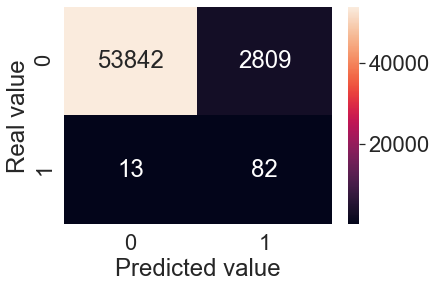

In [51]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred_logi1)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

#    

Let  us see how we can improve the model by using the hyperparameter tuning

In [52]:
# Creating the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
Cs = [0.001, 0.1, 1, 10, 100]
param_grid_logi = {'C': Cs}
  
# Instantiating the GridSearchCV object
grid_logi= GridSearchCV(logi, param_grid_logi, cv = 10)
  
grid_logi.fit(X_train_smote1, y_train_smote1)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_logi.best_params_)) 
print("Best score is {}".format(grid_logi.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.001}
Best score is 0.9322689139332135


In [53]:
# Storing the predictions of the logistic regression model
y_pred_logi1_grid = grid_logi.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_logi1_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_logi1_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_logi1_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_logi1_grid)))

F1 score: 0.064383
Accuracy: 0.960050
AUC: 0.890668
Precision: 0.033505


In [54]:
print(classification_report(y_test_encoded, y_pred_logi1_grid))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     56651
         1.0       0.03      0.82      0.06        95

    accuracy                           0.96     56746
   macro avg       0.52      0.89      0.52     56746
weighted avg       1.00      0.96      0.98     56746



Text(0.5, 2.5, 'Predicted value')

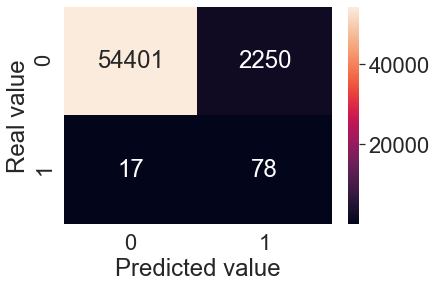

In [55]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred_logi1_grid)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

# 

**b-with original data**

In [56]:
# Building the logistic regression model
logi = LogisticRegression()
logi.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the logistic regression model
y_pred_logi2 = logi.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_logi2)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_logi2)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_logi2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_logi2)))

F1 score: 0.120377
Accuracy: 0.978624
AUC: 0.926242
Precision: 0.064642


In [57]:
print(classification_report(y_test, y_pred_logi2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746



Text(0.5, 2.5, 'Predicted value')

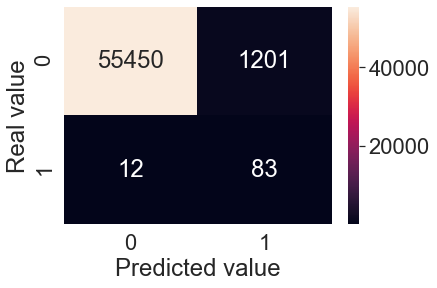

In [58]:
cm = metrics.confusion_matrix(y_test, y_pred_logi2)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

# 

Let us see how we can improve the model by using the hyperparameter tuning

In [59]:
grid_logi.fit(X_train_smote2, y_train_smote2)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_logi.best_params_)) 
print("Best score is {}".format(grid_logi.best_score_))

Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.9537448880636553


In [60]:
# Storing the predictions of the logistic regression model
y_pred_logi2_grid = grid_logi.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_logi2_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_logi2_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_logi2_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_logi2_grid)))

F1 score: 0.120203
Accuracy: 0.978589
AUC: 0.926224
Precision: 0.064541


In [61]:
print(classification_report(y_test, y_pred_logi2_grid))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746



Text(0.5, 2.5, 'Predicted value')

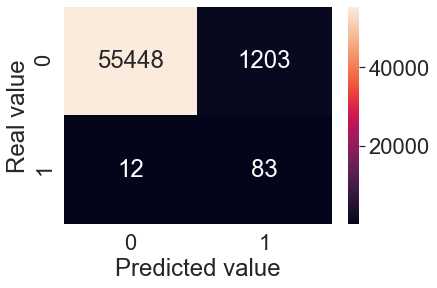

In [62]:
cm = metrics.confusion_matrix(y_test, y_pred_logi2_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

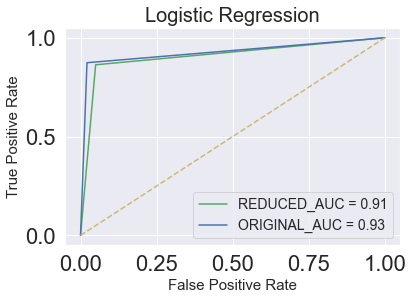

In [63]:
#----------Logistic Regression for Reduced data---------

fp_log1, tp_log1, threshold_log1 = metrics.roc_curve(y_test_encoded, y_pred_logi1)
roc_auc_log1 = metrics.auc(fp_log1, tp_log1)
plt.plot(fp_log1, tp_log1, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_log1, color='g')

#----------Logistic Regression for Originaldata---------

fp_log2, tp_log2, threshold_log2 = metrics.roc_curve(y_test, y_pred_logi2)
roc_auc_log2 = metrics.auc(fp_log2, tp_log2)
plt.plot(fp_log2, tp_log2, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_log2, color='b')

#----------Plotting both data---------

plt.title('Logistic Regression',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

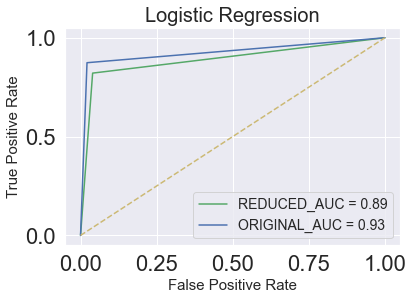

In [84]:
#----------Logistic Regression for Reduced data---------

fp_log1_grid, tp_log1_grid, threshold_log1_grid = metrics.roc_curve(y_test_encoded, y_pred_logi1_grid)
roc_auc_log1_grid = metrics.auc(fp_log1_grid, tp_log1_grid)
plt.plot(fp_log1_grid, tp_log1_grid, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_log1_grid, color='g')

#----------Logistic Regression for Originaldata---------

fp_log2_grid, tp_log2_grid, threshold_log2_grid = metrics.roc_curve(y_test, y_pred_logi2_grid)
roc_auc_log2_grid = metrics.auc(fp_log2_grid, tp_log2_grid)
plt.plot(fp_log2_grid, tp_log2_grid, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_log2_grid, color='b')

#----------Plotting both data---------

plt.title('Logistic Regression',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

We can see that the balanced data not reduced gives us better performance metrics than the auto_encoded reduced data.

**2-Support Vector Machine**

**a-With Reduced data**

In [64]:
# Building the Support Vector Classifier model
svmc = SVC()
svmc.fit(X_train_smote1, y_train_smote1)
# Storing the predictions of the Support Vector Classifier model
y_pred_svmc1 = svmc.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_svmc1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_svmc1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_svmc1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_svmc1)))

F1 score: 0.232919
Accuracy: 0.991295
AUC: 0.890553
Precision: 0.136612


In [65]:
print(classification_report(y_test_encoded, y_pred_svmc1))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     56651
         1.0       0.14      0.79      0.23        95

    accuracy                           0.99     56746
   macro avg       0.57      0.89      0.61     56746
weighted avg       1.00      0.99      0.99     56746



Text(0.5, 2.5, 'Predicted value')

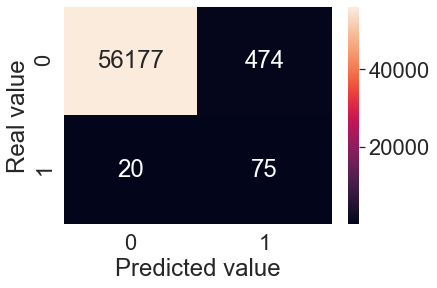

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred_svmc1)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

# 

Let us see how we can improve the model by using the hyperparameter tuning

In [69]:
param_grid_svmc = { 'C':[0.1],'kernel':['poly']}

grid_svmc = GridSearchCV(svmc,param_grid_svmc,refit=True,verbose=3, n_jobs= -1, cv= 2)
#Fit the gridsearchCV on oversampled dataset
grid_svmc.fit(X_train_smote1, y_train_smote1)
grid_svmc.estimator
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_svmc.best_params_)) 
print("Best score is {}".format(grid_svmc.best_score_))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Tuned Logistic Regression Parameters: {'C': 0.1, 'kernel': 'poly'}
Best score is 0.9672288858880327


The grid search had explored a various combination of Support Vector Machine hyper parameters and trained each model 3 times(Since we are using 3 fold cross-validation) and after training the model on under Sampled dataset we Found the best parameters as

In [70]:
# Storing the predictions of the Support Vector Classifier model
y_pred_svmc1_grid = grid_svmc.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_svmc1_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_svmc1_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_svmc1_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_svmc1_grid)))

F1 score: 0.110204
Accuracy: 0.976950
AUC: 0.914895
Precision: 0.058909


In [71]:
print(classification_report(y_test_encoded, y_pred_svmc1_grid))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56651
         1.0       0.06      0.85      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.91      0.55     56746
weighted avg       1.00      0.98      0.99     56746



Text(0.5, 2.5, 'Predicted value')

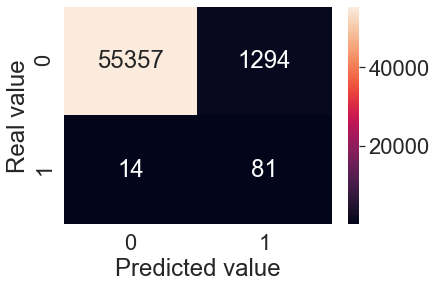

In [72]:
cm = metrics.confusion_matrix(y_test, y_pred_svmc1_grid)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

# 

**b-with original data**

In [73]:
svmc.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the linear model
y_pred_svmc2 = svmc.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_svmc2)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_svmc2)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_svmc2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_svmc2)))

F1 score: 0.167756
Accuracy: 0.986536
AUC: 0.898679
Precision: 0.093560


In [74]:
print(classification_report(y_test, y_pred_svmc2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.09      0.81      0.17        95

    accuracy                           0.99     56746
   macro avg       0.55      0.90      0.58     56746
weighted avg       1.00      0.99      0.99     56746



Text(0.5, 2.5, 'Predicted value')

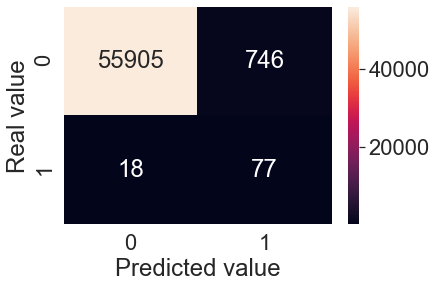

In [75]:
cm = metrics.confusion_matrix(y_test, y_pred_svmc2)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

# 

Let us see how we can improve the model by using the hyperparameter tuning

In [76]:
grid_svmc.fit(X_train_smote2, y_train_smote2)
grid_svmc.estimator
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_svmc.best_params_)) 
print("Best score is {}".format(grid_svmc.best_score_))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Tuned Logistic Regression Parameters: {'C': 0.1, 'kernel': 'poly'}
Best score is 0.9315495891474921


In [77]:
# Storing the predictions of the Support Vector Classifier model
y_pred_svmc2_grid = grid_svmc.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_svmc2_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_svmc2_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_svmc2_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_svmc2_grid)))

F1 score: 0.707547
Accuracy: 0.998907
AUC: 0.894366
Precision: 0.641026


In [78]:
print(classification_report(y_test, y_pred_svmc2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.09      0.81      0.17        95

    accuracy                           0.99     56746
   macro avg       0.55      0.90      0.58     56746
weighted avg       1.00      0.99      0.99     56746



Text(0.5, 2.5, 'Predicted value')

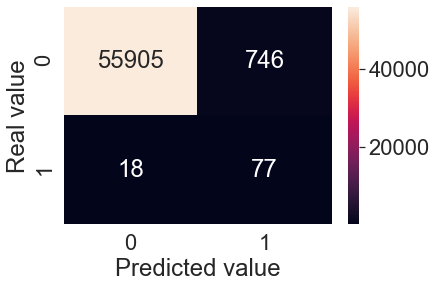

In [79]:
cm = metrics.confusion_matrix(y_test, y_pred_svmc2)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

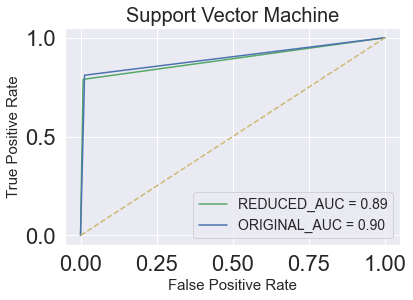

In [81]:
#----------Support Vector Machine for Reduced data---------

fp_svm1, tp_svm1, threshold_svm1 = metrics.roc_curve(y_test_encoded, y_pred_svmc1)
roc_auc_svm1 = metrics.auc(fp_svm1, tp_svm1)
plt.plot(fp_svm1, tp_svm1, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_svm1, color='g')

#----------Support Vector Machine for Original data---------

fp_svm2, tp_svm2, threshold_svm2 = metrics.roc_curve(y_test, y_pred_svmc2)
roc_auc_svm2 = metrics.auc(fp_svm2, tp_svm2)
plt.plot(fp_svm2, tp_svm2, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_svm2, color='b')

#----------Plotting both data---------

plt.title('Support Vector Machine',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

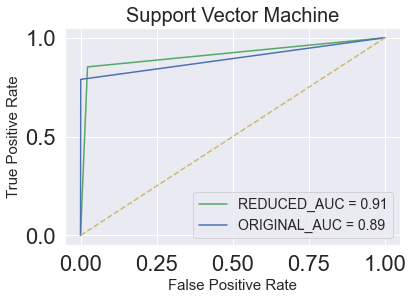

In [83]:
#----------Support Vector Machine for Reduced data---------

fp_svm1_grid, tp_svm1_grid, threshold_svm1_grid = metrics.roc_curve(y_test_encoded, y_pred_svmc1_grid)
roc_auc_svm1_grid = metrics.auc(fp_svm1_grid, tp_svm1_grid)
plt.plot(fp_svm1_grid, tp_svm1_grid, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_svm1_grid, color='g')

#----------Support Vector Machine for Original data---------

fp_svm2_grid, tp_svm2_grid, threshold_svm2_grid = metrics.roc_curve(y_test, y_pred_svmc2_grid)
roc_auc_svm2_grid = metrics.auc(fp_svm2_grid, tp_svm2_grid)
plt.plot(fp_svm2_grid, tp_svm2_grid, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_svm2_grid, color='b')

#----------Plotting both data---------

plt.title('Support Vector Machine',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

**3-GaussianNB**

**a-With Reduced data**

In [85]:
# Building the Gaussian Naive Bayes Classifier model
gnb = GaussianNB()
gnb.fit(X_train_smote1, y_train_smote1)
# Storing the predictions of the Gaussian Naive Bayes model
y_pred_gnb1 = gnb.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_gnb1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_gnb1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_gnb1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_gnb1)))

F1 score: 0.019948
Accuracy: 0.880520
AUC: 0.803547
Precision: 0.010113


In [86]:
print(classification_report(y_test_encoded, y_pred_gnb1))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     56651
         1.0       0.01      0.73      0.02        95

    accuracy                           0.88     56746
   macro avg       0.50      0.80      0.48     56746
weighted avg       1.00      0.88      0.93     56746



Text(0.5, 2.5, 'Predicted value')

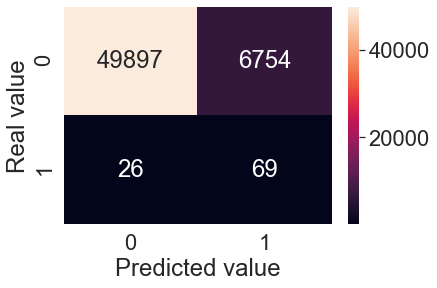

In [87]:
cm = metrics.confusion_matrix(y_test, y_pred_gnb1)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

# 

Let us see how we can improve the model by using the hyperparameter tuning

In [95]:
#param_grid_gnb = { 'C':[0.1],'kernel':['poly']}
param_grid_gnb = {'var_smoothing': np.logspace(0,-9, num=50)}
grid_gnb = GridSearchCV(gnb,param_grid_gnb,refit=True,verbose=3, n_jobs= -1, cv= 3)

#Fit the gridsearchCV on dataset
grid_gnb.fit(X_train_smote1, y_train_smote1)
grid_gnb.estimator
# Print the tuned parameters and score
print("Tuned Gaussian Naive Bayes Parameters: {}".format(grid_gnb.best_params_)) 
print("Best score is {}".format(grid_gnb.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuned Gaussian Naive Bayes Parameters: {'var_smoothing': 1.6768329368110066e-05}
Best score is 0.855071888156327


In [96]:
# Storing the predictions of the Gaussian Naive Bayes model
y_pred_gnb1_grid = grid_gnb.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_gnb1_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_gnb1_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_gnb1_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_gnb1_grid)))

F1 score: 0.019942
Accuracy: 0.880485
AUC: 0.803530
Precision: 0.010110


In [97]:
print(classification_report(y_test_encoded, y_pred_gnb1_grid))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     56651
         1.0       0.01      0.73      0.02        95

    accuracy                           0.88     56746
   macro avg       0.50      0.80      0.48     56746
weighted avg       1.00      0.88      0.93     56746



Text(0.5, 2.5, 'Predicted value')

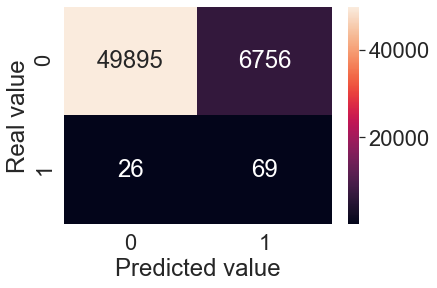

In [98]:
cm = metrics.confusion_matrix(y_test, y_pred_gnb1_grid)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**b-with original data**

In [99]:
# Building the Gaussian Naive Bayes Classifier model
gnb.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the Gaussian Naive Bayes Classifier model
y_pred_gnb2 = gnb.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_gnb2)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_gnb2)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_gnb2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_gnb2)))

F1 score: 0.100066
Accuracy: 0.975910
AUC: 0.888103
Precision: 0.053371


In [100]:
print(classification_report(y_test, y_pred_gnb2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.05      0.80      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.89      0.54     56746
weighted avg       1.00      0.98      0.99     56746



Text(0.5, 2.5, 'Predicted value')

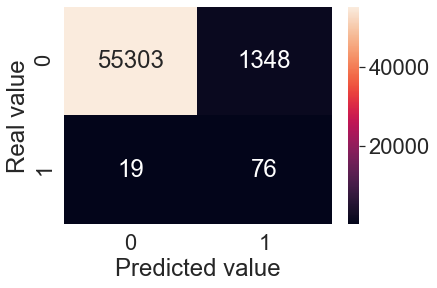

In [101]:
cm = metrics.confusion_matrix(y_test, y_pred_gnb2)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

# 

Let us see how we can improve the model by using the hyperparameter tuning

In [102]:
grid_gnb.fit(X_train_smote2, y_train_smote2)
grid_gnb.estimator
# Print the tuned parameters and score
print("Tuned Gaussian Naive Bayes Parameters: {}".format(grid_gnb.best_params_)) 
print("Best score is {}".format(grid_gnb.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuned Gaussian Naive Bayes Parameters: {'var_smoothing': 0.0026826957952797246}
Best score is 0.9201551619138401


In [103]:
# Storing the predictions of the Gaussian Naive Bayes Classifier model
y_pred_gnb2_grid = gnb.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_gnb2_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_gnb2_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_gnb2_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_gnb2_grid)))

F1 score: 0.100066
Accuracy: 0.975910
AUC: 0.888103
Precision: 0.053371


In [104]:
print(classification_report(y_test, y_pred_gnb2_grid))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.05      0.80      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.89      0.54     56746
weighted avg       1.00      0.98      0.99     56746



Text(0.5, 2.5, 'Predicted value')

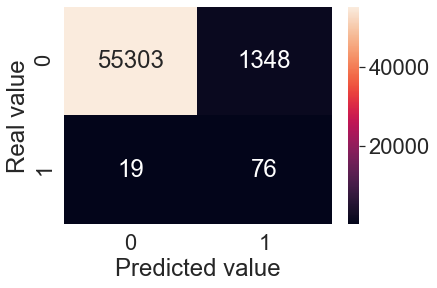

In [105]:
cm = metrics.confusion_matrix(y_test, y_pred_gnb2_grid)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

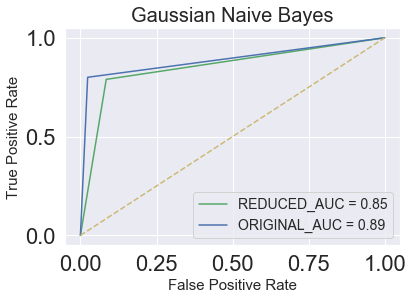

In [242]:
#----------Gaussian Naive Bayes for Reduced data---------

fp_gnb1, tp_gnb1, threshold_gnb1 = metrics.roc_curve(y_test_encoded, y_pred_gnb1)
roc_auc_gnb1 = metrics.auc(fp_gnb1, tp_gnb1)
plt.plot(fp_gnb1, tp_gnb1, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_gnb1, color='g')

#----------Gaussian Naive Bayes for Original data---------

fp_gnb2, tp_gnb2, threshold_gnb2 = metrics.roc_curve(y_test, y_pred_gnb2)
roc_auc_gnb2 = metrics.auc(fp_gnb2, tp_gnb2)
plt.plot(fp_gnb2, tp_gnb2, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_gnb2, color='b')

#----------Plotting both data---------

plt.title('Gaussian Naive Bayes',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

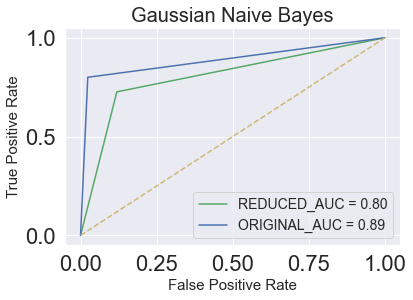

In [106]:
#----------Gaussian Naive Bayes for Reduced data---------

fp_gnb1_grid, tp_gnb1_grid, threshold_gnb1_grid = metrics.roc_curve(y_test_encoded, y_pred_gnb1_grid)
roc_auc_gnb1_grid = metrics.auc(fp_gnb1_grid, tp_gnb1_grid)
plt.plot(fp_gnb1_grid, tp_gnb1_grid, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_gnb1_grid, color='g')

#----------Gaussian Naive Bayes for Original data---------

fp_gnb2_grid, tp_gnb2_grid, threshold_gnb2_grid = metrics.roc_curve(y_test, y_pred_gnb2_grid)
roc_auc_gnb2_grid = metrics.auc(fp_gnb2_grid, tp_gnb2_grid)
plt.plot(fp_gnb2_grid, tp_gnb2_grid, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_gnb2_grid, color='b')

#----------Plotting both data---------

plt.title('Gaussian Naive Bayes',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

**4-Decision Tree**

**a-With Reduced data**

In [107]:
# Building the Decision tree Classifier model
dst = DecisionTreeClassifier(random_state=0)
dst.fit(X_train_smote1, y_train_smote1)
# Storing the predictions of the decision tree Classifier model
y_pred_dst1 = dst.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_dst1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_dst1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_dst1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_dst1)))

F1 score: 0.371951
Accuracy: 0.996370
AUC: 0.819535
Precision: 0.261803


In [108]:
print(classification_report(y_test_encoded, y_pred_dst1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.26      0.64      0.37        95

    accuracy                           1.00     56746
   macro avg       0.63      0.82      0.69     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

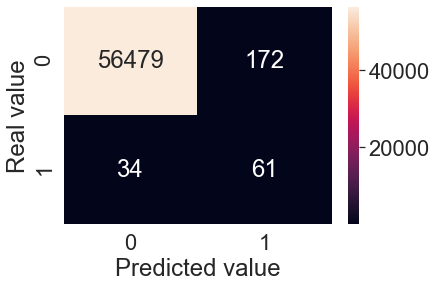

In [109]:
cm = metrics.confusion_matrix(y_test, y_pred_dst1)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

The grid search had explored a various combination of decision Tree hyper parameters and trained each model 3 times and after training the model on under Sampled dataset we Found the best hyper parameters : selection criteria as entropy with maximum depth of 19

In [110]:
param_grid_dst = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 20)}
grid_dst = GridSearchCV(DecisionTreeClassifier() , param_grid_dst, cv=3,verbose= 2)
grid_dst.fit(X_train_smote1, y_train_smote1)
grid_dst.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.8s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.8s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.7s
[CV] END ........................criterion=gini, max_depth=3; total time=   1.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   1.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   1.1s
[CV] END ........................criterion=gini, max_depth=4; total time=   1.4s
[CV] END ........................criterion=gini, max_depth=4; total time=   1.5s
[CV] END ........................criterion=gini, max_depth=4; total time=   1.5s
[CV] END ........................criterion=gini, max_depth=5; total time=   1.8s
[CV] END ........................criterion=gini, max_depth=5; total time=   1.8s
[CV] END ........................criterion=gini

{'criterion': 'entropy', 'max_depth': 19}

In [111]:
# Storing the predictions of the decision tree Classifier model
y_pred_dst1_grid = grid_dst.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_dst1_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_dst1_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_dst1_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_dst1_grid)))

F1 score: 0.328283
Accuracy: 0.995312
AUC: 0.840022
Precision: 0.215947


In [112]:
print(classification_report(y_test_encoded, y_pred_dst1_grid))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.22      0.68      0.33        95

    accuracy                           1.00     56746
   macro avg       0.61      0.84      0.66     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

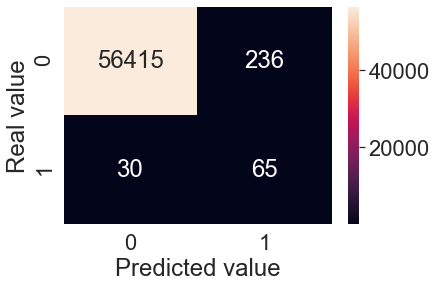

In [114]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred_dst1_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**b-with original data**

In [115]:
dst.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the decision tree Classifier model
y_pred_dst2 = dst.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_dst2)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_dst2)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_dst2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_dst2)))

F1 score: 0.590164
Accuracy: 0.998238
AUC: 0.878268
Precision: 0.483221


In [116]:
print(classification_report(y_test, y_pred_dst2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.48      0.76      0.59        95

    accuracy                           1.00     56746
   macro avg       0.74      0.88      0.79     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

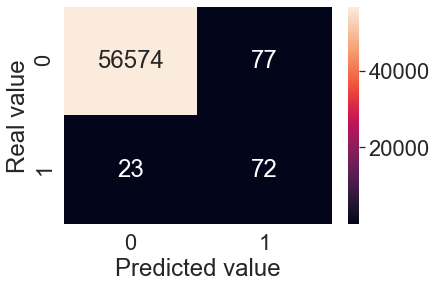

In [117]:
cm = metrics.confusion_matrix(y_test, y_pred_dst2)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [118]:
grid_dst.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the decision tree Classifier model
y_pred_dst2_grid = dst.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_dst2_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_dst2_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_dst2_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_dst2_grid)))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   1.8s
[CV] END ........................criterion=gini, max_depth=2; total time=   1.8s
[CV] END ........................criterion=gini, max_depth=2; total time=   1.8s
[CV] END ........................criterion=gini, max_depth=3; total time=   2.7s
[CV] END ........................criterion=gini, max_depth=3; total time=   2.7s
[CV] END ........................criterion=gini, max_depth=3; total time=   2.7s
[CV] END ........................criterion=gini, max_depth=4; total time=   3.6s
[CV] END ........................criterion=gini, max_depth=4; total time=   3.6s
[CV] END ........................criterion=gini, max_depth=4; total time=   3.6s
[CV] END ........................criterion=gini, max_depth=5; total time=   4.4s
[CV] END ........................criterion=gini, max_depth=5; total time=   4.5s
[CV] END ........................criterion=gini

In [119]:
print(classification_report(y_test, y_pred_dst2_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.48      0.76      0.59        95

    accuracy                           1.00     56746
   macro avg       0.74      0.88      0.79     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

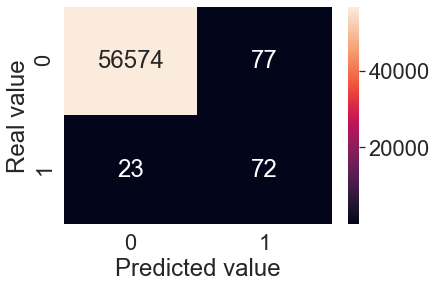

In [120]:
cm = metrics.confusion_matrix(y_test, y_pred_dst2_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

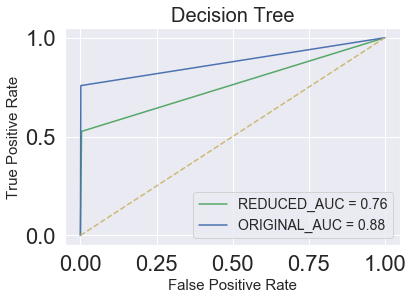

In [238]:
#----------Decision Tree for Reduced data---------

fp_dst1, tp_dst1, threshold_svm1 = metrics.roc_curve(y_test_encoded, y_pred_dst1)
roc_auc_dst1 = metrics.auc(fp_dst1, tp_dst1)
plt.plot(fp_dst1, tp_dst1, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_dst1, color='g')

#----------Decission Tree Machine for Original data---------

fp_dst2, tp_dst2, threshold_dst2 = metrics.roc_curve(y_test, y_pred_dst2)
roc_auc_dst2 = metrics.auc(fp_dst2, tp_dst2)
plt.plot(fp_dst2, tp_dst2, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_dst2, color='b')

#----------Plotting both data---------

plt.title('Decision Tree',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

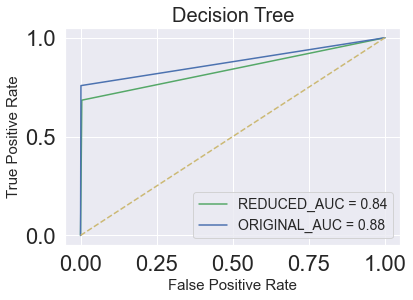

In [121]:
#----------Decision Tree for Reduced data---------

fp_dst1_grid, tp_dst1_grid, threshold_dst1_grid = metrics.roc_curve(y_test_encoded, y_pred_dst1_grid)
roc_auc_dst1_grid = metrics.auc(fp_dst1_grid, tp_dst1_grid)
plt.plot(fp_dst1_grid, tp_dst1_grid, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_dst1_grid, color='g')

#----------Decission Tree Machine for Original data---------

fp_dst2_grid, tp_dst2_grid, threshold_dst2_grid = metrics.roc_curve(y_test, y_pred_dst2_grid)
roc_auc_dst2_grid = metrics.auc(fp_dst2_grid, tp_dst2_grid)
plt.plot(fp_dst2_grid, tp_dst2_grid, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_dst2_grid, color='b')

#----------Plotting both data---------

plt.title('Decision Tree',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

**5-Random Forest**

**a-With Reduced data**

In [122]:
randf = RandomForestClassifier(n_estimators=10)
randf.fit(X_train_smote1, y_train_smote1)
# Storing the predictions of the Random Forest Classifier model
y_pred_randf1 = randf.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_randf1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_randf1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_randf1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_randf1)))

F1 score: 0.695652
Accuracy: 0.999013
AUC: 0.836621
Precision: 0.719101


In [132]:
print(classification_report(y_test_encoded, y_pred_randf1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.72      0.67      0.70        95

    accuracy                           1.00     56746
   macro avg       0.86      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

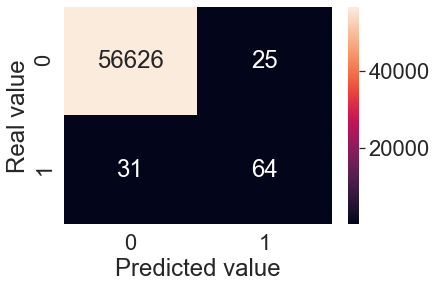

In [133]:
cm = metrics.confusion_matrix(y_test, y_pred_randf1)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

The grid search had explored a various combination of decision Tree hyperparameters and trained each model three times and after training the model on under Sampled dataset, we Found the best hyperparameters: selection criteria as Gini and it trained an ensemble of 25 Decision Tree classifiers

In [134]:
param_grid_randf = [{'n_estimators': [5,10, 25],'criterion':['gini','entropy']}]
grid_randf = GridSearchCV(randf, param_grid= param_grid_randf, verbose=2, cv =2)
grid_randf.fit(X_train_smote1, y_train_smote1)
grid_randf.best_params_

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END .....................criterion=gini, n_estimators=5; total time=   3.2s
[CV] END .....................criterion=gini, n_estimators=5; total time=   3.1s
[CV] END ....................criterion=gini, n_estimators=10; total time=   6.2s
[CV] END ....................criterion=gini, n_estimators=10; total time=   6.1s
[CV] END ....................criterion=gini, n_estimators=25; total time=  15.9s
[CV] END ....................criterion=gini, n_estimators=25; total time=  16.1s
[CV] END ..................criterion=entropy, n_estimators=5; total time=   3.5s
[CV] END ..................criterion=entropy, n_estimators=5; total time=   3.3s
[CV] END .................criterion=entropy, n_estimators=10; total time=   6.7s
[CV] END .................criterion=entropy, n_estimators=10; total time=   7.0s
[CV] END .................criterion=entropy, n_estimators=25; total time=  17.0s
[CV] END .................criterion=entropy, n_es

{'criterion': 'gini', 'n_estimators': 25}

In [135]:
# Storing the predictions of the Random Forest Classifier model
y_pred_randf1_grid = grid_randf.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_randf1_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_randf1_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_randf1_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_randf1_grid)))

F1 score: 0.695187
Accuracy: 0.998996
AUC: 0.841867
Precision: 0.706522


In [136]:
print(classification_report(y_test_encoded, y_pred_randf1_grid))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.71      0.68      0.70        95

    accuracy                           1.00     56746
   macro avg       0.85      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

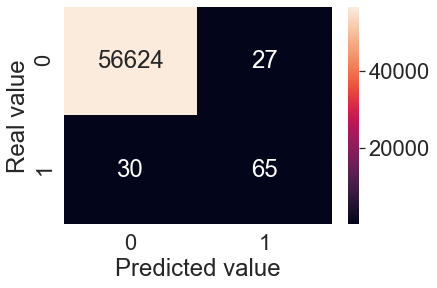

In [137]:
cm = metrics.confusion_matrix(y_test, y_pred_randf1_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**b-with original data**

In [138]:
randf.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the Random Forest Classifier model
y_pred_randf2 = randf.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_randf2)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_randf2)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_randf2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_randf2)))

F1 score: 0.806818
Accuracy: 0.999401
AUC: 0.873596
Precision: 0.876543


In [139]:
print(classification_report(y_test, y_pred_randf2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.75      0.81        95

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

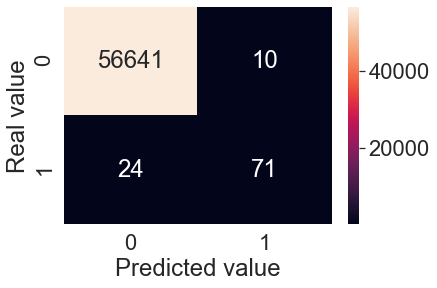

In [140]:
cm = metrics.confusion_matrix(y_test, y_pred_randf2)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [141]:
grid_randf.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the Random Forest Classifier model
y_pred_randf2_grid = grid_randf.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_randf2_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_randf2_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_randf2_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_randf2_grid)))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END .....................criterion=gini, n_estimators=5; total time=   4.5s
[CV] END .....................criterion=gini, n_estimators=5; total time=   4.5s
[CV] END ....................criterion=gini, n_estimators=10; total time=   9.0s
[CV] END ....................criterion=gini, n_estimators=10; total time=   8.9s
[CV] END ....................criterion=gini, n_estimators=25; total time=  22.1s
[CV] END ....................criterion=gini, n_estimators=25; total time=  23.5s
[CV] END ..................criterion=entropy, n_estimators=5; total time=   4.7s
[CV] END ..................criterion=entropy, n_estimators=5; total time=   5.0s
[CV] END .................criterion=entropy, n_estimators=10; total time=   9.2s
[CV] END .................criterion=entropy, n_estimators=10; total time=  10.0s
[CV] END .................criterion=entropy, n_estimators=25; total time=  23.1s
[CV] END .................criterion=entropy, n_es

In [142]:
print(classification_report(y_test, y_pred_randf2_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.76      0.80        95

    accuracy                           1.00     56746
   macro avg       0.92      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

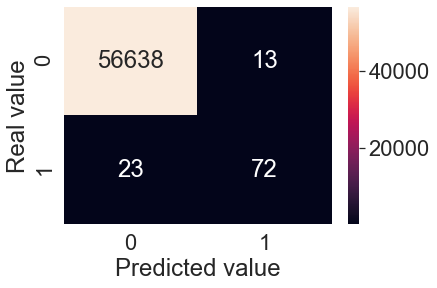

In [143]:
cm = metrics.confusion_matrix(y_test, y_pred_randf2_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

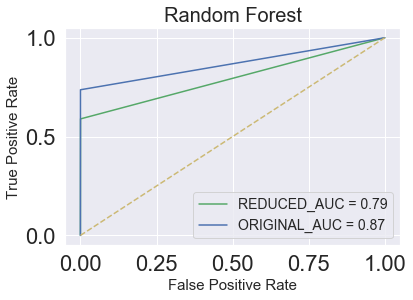

In [243]:
#----------Random Forest for Reduced data---------

fp_randf1, tp_randf1, threshold_randf1 = metrics.roc_curve(y_test_encoded, y_pred_randf1)
roc_auc_randf1 = metrics.auc(fp_randf1, tp_randf1)
plt.plot(fp_randf1, tp_randf1, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_randf1, color='g')

#----------Random Forest for Original data---------

fp_randf2, tp_randf2, threshold_randf2 = metrics.roc_curve(y_test, y_pred_randf2)
roc_auc_randf2 = metrics.auc(fp_randf2, tp_randf2)
plt.plot(fp_randf2, tp_randf2, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_randf2, color='b')

#----------Plotting both data---------

plt.title('Random Forest',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

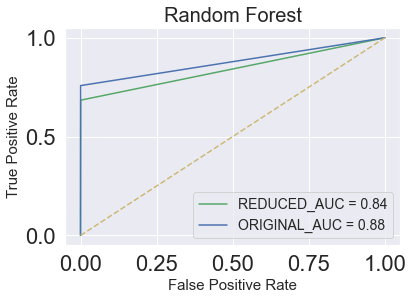

In [145]:
#----------Random Forest for Reduced data---------

fp_randf1_grid, tp_randf1_grid, threshold_randf1_grid = metrics.roc_curve(y_test_encoded, y_pred_randf1_grid)
roc_auc_randf1_grid = metrics.auc(fp_randf1_grid, tp_randf1_grid)
plt.plot(fp_randf1_grid, tp_randf1_grid, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_randf1_grid, color='g')

#----------Random Forest for Original data---------

fp_randf2_grid, tp_randf2_grid, threshold_randf2_grid = metrics.roc_curve(y_test, y_pred_randf2_grid)
roc_auc_randf2_grid = metrics.auc(fp_randf2_grid, tp_randf2_grid)
plt.plot(fp_randf2_grid, tp_randf2_grid, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_randf2_grid, color='b')

#----------Plotting both data---------

plt.title('Random Forest',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

**6-XGBoost**

**a-With Reduced data**

In [146]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train_smote1, y_train_smote1)
# Storing the predictions of the XGBoost Classifier model
y_pred_xgb1 = xgb.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_xgb1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_xgb1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_xgb1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_xgb1)))

F1 score: 0.100475
Accuracy: 0.976650
AUC: 0.877965
Precision: 0.053701


In [147]:
print(classification_report(y_test_encoded, y_pred_xgb1))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56651
         1.0       0.05      0.78      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.88      0.54     56746
weighted avg       1.00      0.98      0.99     56746



Text(0.5, 2.5, 'Predicted value')

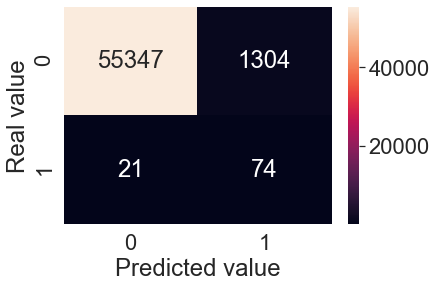

In [148]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred_xgb1)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [174]:
param_grid_xgb= {'max_depth': range (3),'n_estimators': range(5),'learning_rate': [0.1]}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,scoring = 'roc_auc', n_jobs = 10, cv = 3,verbose=True)
grid_xgb.fit(X_train_smote1, y_train_smote1)
grid_xgb.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\DS07\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


21 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DS07\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DS07\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\DS07\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 269, in _check_params
    raise ValueError(
ValueError: n_estimators must be greater than 0 but was 0

----------

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 4}

In [175]:
y_pred_xgb1_grid = grid_xgb.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_xgb1_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_xgb1_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_xgb1_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_xgb1_grid)))

F1 score: 0.036293
Accuracy: 0.939168
AUC: 0.811903
Precision: 0.018641


In [176]:
print(classification_report(y_test_encoded, y_pred_xgb1_grid))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     56651
         1.0       0.02      0.68      0.04        95

    accuracy                           0.94     56746
   macro avg       0.51      0.81      0.50     56746
weighted avg       1.00      0.94      0.97     56746



Text(0.5, 2.5, 'Predicted value')

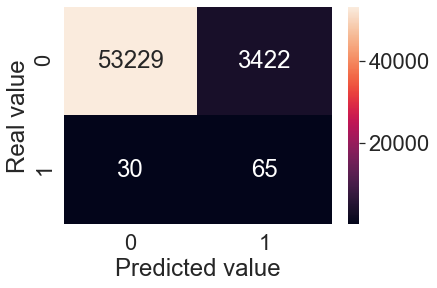

In [177]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred_xgb1_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**b-with original data**

In [178]:
xgb.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the XGBoost Classifier model
y_pred_xgb2 = xgb.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_xgb2)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_xgb2)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_xgb2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_xgb2)))

F1 score: 0.208108
Accuracy: 0.989673
AUC: 0.900250
Precision: 0.119380


In [179]:
print(classification_report(y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.12      0.81      0.21        95

    accuracy                           0.99     56746
   macro avg       0.56      0.90      0.60     56746
weighted avg       1.00      0.99      0.99     56746



Text(0.5, 2.5, 'Predicted value')

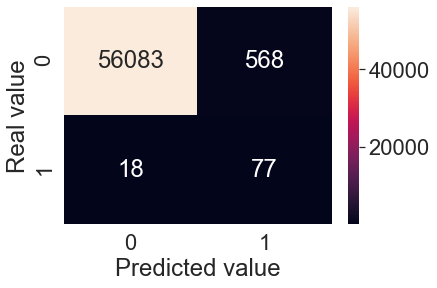

In [180]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb2)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [181]:
grid_xgb.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the XGBoost Classifier model
y_pred_xgb2_grid = grid_xgb.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_xgb2_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_xgb2_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_xgb2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_xgb2_grid)))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\DS07\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


21 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DS07\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DS07\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\DS07\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 269, in _check_params
    raise ValueError(
ValueError: n_estimators must be greater than 0 but was 0

----------

F1 score: 0.127764
Accuracy: 0.981232
AUC: 0.900250
Precision: 0.069272


In [182]:
print(classification_report(y_test, y_pred_xgb2_grid))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.82      0.13        95

    accuracy                           0.98     56746
   macro avg       0.53      0.90      0.56     56746
weighted avg       1.00      0.98      0.99     56746



Text(0.5, 2.5, 'Predicted value')

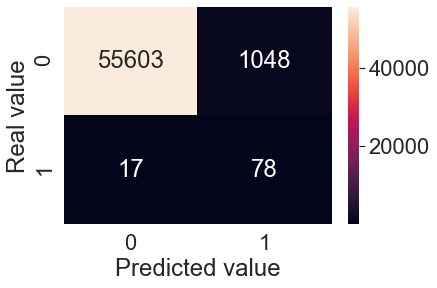

In [183]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb2_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

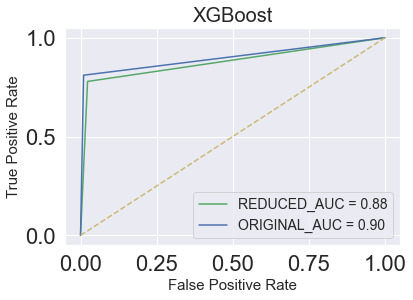

In [186]:
#----------XGBoost for Reduced data---------

fp_xgb1, tp_xgb1, threshold_xgb1 = metrics.roc_curve(y_test_encoded, y_pred_xgb1)
roc_auc_xgb1 = metrics.auc(fp_xgb1, tp_xgb1)
plt.plot(fp_xgb1, tp_xgb1, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_xgb1, color='g')

#----------XGBoost for Original data---------

fp_xgb2, tp_xgb2, threshold_xgb2 = metrics.roc_curve(y_test, y_pred_xgb2)
roc_auc_xgb2 = metrics.auc(fp_xgb2, tp_xgb2)
plt.plot(fp_xgb2, tp_xgb2, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_xgb2, color='b')

#----------Plotting both data---------

plt.title('XGBoost',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

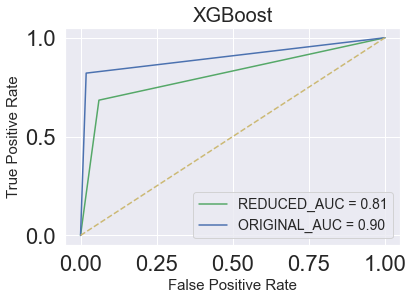

In [187]:
#----------XGBoost for Reduced data---------

fp_xgb1_grid, tp_xgb1_grid, threshold_xgb1_grid = metrics.roc_curve(y_test_encoded, y_pred_xgb1_grid)
roc_auc_xgb1_grid = metrics.auc(fp_xgb1_grid, tp_xgb1_grid)
plt.plot(fp_xgb1_grid, tp_xgb1_grid, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_xgb1_grid, color='g')

#----------XGBoost for Original data---------

fp_xgb2_grid, tp_xgb2_grid, threshold_xgb2_grid = metrics.roc_curve(y_test, y_pred_xgb2_grid)
roc_auc_xgb2_grid = metrics.auc(fp_xgb2_grid, tp_xgb2_grid)
plt.plot(fp_xgb2_grid, tp_xgb2_grid, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_xgb2_grid, color='b')

#----------Plotting both data---------

plt.title('XGBoost',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

**7-Deep Neural Network**

**a-With Reduced data**

In [151]:
model1 = tf.keras.Sequential([
keras.layers.Dense(units=10, input_shape=X_train_smote1.shape[1:], activation ='relu'),
keras.layers.Dense(1, activation= 'sigmoid')])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                130       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [159]:
model1.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model1.fit(X_train_smote1, y_train_smote1, epochs= 30)
# Storing the predictions of the Neural Network model
y_pred1 = model1.predict(X_test_encoded)
y_pred1_bool = np.round(y_pred1)
y_pred1 = y_pred1_bool.tolist()
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred1)))
#model_performance(y_test_encoded, y_pred1)

Epoch 1/30
14163/14163 [==============================] - 13s 881us/step - loss: 0.0937 - accuracy: 0.9642
Epoch 2/30
14163/14163 [==============================] - 12s 872us/step - loss: 0.0937 - accuracy: 0.9641
Epoch 3/30
14163/14163 [==============================] - 13s 919us/step - loss: 0.0937 - accuracy: 0.9641
Epoch 4/30
14163/14163 [==============================] - 12s 863us/step - loss: 0.0937 - accuracy: 0.9640
Epoch 5/30
14163/14163 [==============================] - 14s 963us/step - loss: 0.0936 - accuracy: 0.9640
Epoch 6/30
14163/14163 [==============================] - 16s 1ms/step - loss: 0.0936 - accuracy: 0.9641
Epoch 7/30
14163/14163 [==============================] - 16s 1ms/step - loss: 0.0935 - accuracy: 0.9641
Epoch 8/30
14163/14163 [==============================] - 14s 1ms/step - loss: 0.0935 - accuracy: 0.9641
Epoch 9/30
14163/14163 [==============================] - 14s 985us/step - loss: 0.0934 - accuracy: 0.9642
Epoch 10/30
14163/14163 [==================

In [184]:
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred1)))

F1 score: 0.066242
Accuracy: 0.961248
AUC: 0.891268
Precision: 0.034513


In [160]:
print(classification_report(y_test_encoded, y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     56651
         1.0       0.03      0.82      0.07        95

    accuracy                           0.96     56746
   macro avg       0.52      0.89      0.52     56746
weighted avg       1.00      0.96      0.98     56746



Text(0.5, 2.5, 'Predicted value')

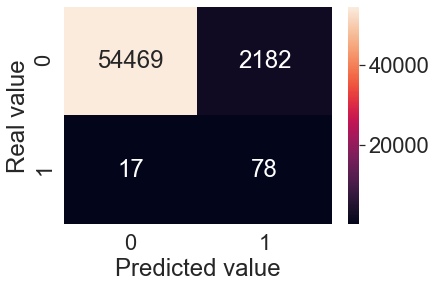

In [186]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred1)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**b-with original data**

In [162]:
model2 = tf.keras.Sequential([
keras.layers.Dense(units=10, input_shape=X_train_smote2.shape[1:], activation ='relu'),
keras.layers.Dense(1, activation= 'sigmoid')])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                310       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [163]:
model2.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model2.fit(X_train_smote2, y_train_smote2, epochs= 30)
# Storing the predictions of the Neural Network model
y_pred2 = model2.predict(X_test)
y_pred1_bool = np.round(y_pred2)
y_pred2 = y_pred1_bool.tolist()
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred2)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred2)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred2)))
#model_performance(y_test_encoded, y_pred1)

Epoch 1/30
14163/14163 [==============================] - 14s 984us/step - loss: 0.1087 - accuracy: 0.9574
Epoch 2/30
14163/14163 [==============================] - 14s 982us/step - loss: 0.0574 - accuracy: 0.9784
Epoch 3/30
14163/14163 [==============================] - 14s 984us/step - loss: 0.0447 - accuracy: 0.9852
Epoch 4/30
14163/14163 [==============================] - 14s 987us/step - loss: 0.0373 - accuracy: 0.9889
Epoch 5/30
14163/14163 [==============================] - 14s 989us/step - loss: 0.0321 - accuracy: 0.9907
Epoch 6/30
14163/14163 [==============================] - 15s 1ms/step - loss: 0.0283 - accuracy: 0.9922
Epoch 7/30
14163/14163 [==============================] - 14s 1ms/step - loss: 0.0254 - accuracy: 0.9936
Epoch 8/30
14163/14163 [==============================] - 14s 992us/step - loss: 0.0232 - accuracy: 0.9946
Epoch 9/30
14163/14163 [==============================] - 15s 1ms/step - loss: 0.0214 - accuracy: 0.9952
Epoch 10/30
14163/14163 [==================

Text(0.5, 2.5, 'Predicted value')

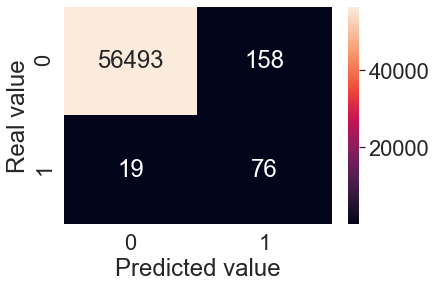

In [185]:
cm = metrics.confusion_matrix(y_test, y_pred2)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

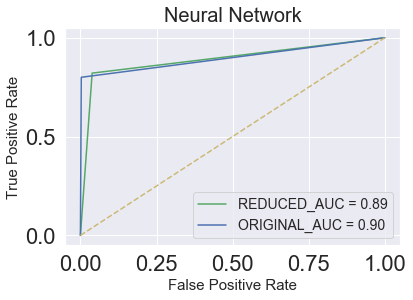

In [239]:
#----------Neural Network Reduced data---------

fp_nm1, tp_nm1, threshold_xgb1 = metrics.roc_curve(y_test_encoded, y_pred1)
roc_auc_nm1 = metrics.auc(fp_nm1, tp_nm1)
plt.plot(fp_nm1, tp_nm1, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_nm1, color='g')

#----------Neural Network for Original data---------

fp_nm2, tp_nm2, threshold_nm2 = metrics.roc_curve(y_test, y_pred2)
roc_auc_nm2 = metrics.auc(fp_nm2, tp_nm2)
plt.plot(fp_nm2, tp_nm2, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_nm2, color='b')

#----------Plotting both data---------

plt.title('Neural Network',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

**8-Bagging Ensemble Classifier**

**a-With Reduced data**

In [194]:
# Building the Bagging Classifier model
bcl = BaggingClassifier()
bcl.fit(X_train_smote1, y_train_smote1)
# Storing the predictions of the Bagging Classifier model
y_pred_bcl1 = bcl.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_bcl1)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_bcl1)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_bcl1)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_bcl1)))

F1 score: 0.576744
Accuracy: 0.998396
AUC: 0.825804
Precision: 0.516667


In [195]:
print(classification_report(y_test_encoded, y_pred_bcl1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.52      0.65      0.58        95

    accuracy                           1.00     56746
   macro avg       0.76      0.83      0.79     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

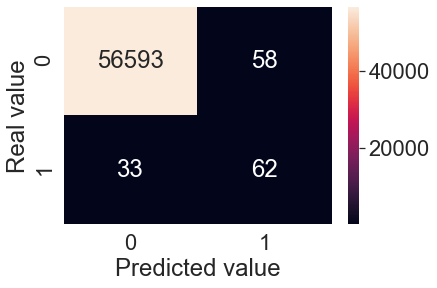

In [196]:
cm = metrics.confusion_matrix(y_test, y_pred_bcl1)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [ ]:
param_grid = {
 'bootstrap': [True, False],
 'bootstrap_features': [True, False],    
 'n_estimators': [5, 10, 15],
 'max_samples' : [0.6, 0.8, 1.0],
 'base_estimator__bootstrap': [True, False],    
 'base_estimator__n_estimators': [100, 200, 300],
 'base_estimator__max_features' : [0.6, 0.8, 1.0]
}

In [ ]:
grid_search=GridSearchCV(BaggingClassifier(base_estimator=RandomForestClassifier()), param_grid=param_grid, cv=5)

In [207]:
param_grid_bcl = {'bootstrap': [True, False],'bootstrap_features': [True, False], 'n_estimators': [5], 'max_samples' : [0.6, 0.8, 1.0]}
#grid_bcl = GridSearchCV(estimator=bcl, param_grid=param_grid_bcl,scoring = 'roc_auc', n_jobs = 10,  cv = 2,verbose=True)
grid_bcl = GridSearchCV(estimator=bcl, param_grid=param_grid_bcl, cv=2)
grid_bcl.fit(X_train_smote1, y_train_smote1)
grid_bcl.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'max_samples': 0.8,
 'n_estimators': 5}

In [208]:
# Storing the predictions of the Bagging Classifier model
y_pred_bcl1_grid = grid_bcl.predict(X_test_encoded)
print("F1 score: {:6f}".format(metrics.f1_score(y_test_encoded, y_pred_bcl1_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test_encoded, y_pred_bcl1_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test_encoded, y_pred_bcl1_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test_encoded, y_pred_bcl1_grid)))

F1 score: 0.695652
Accuracy: 0.999013
AUC: 0.836621
Precision: 0.719101


In [209]:
print(classification_report(y_test_encoded, y_pred_bcl1_grid))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.72      0.67      0.70        95

    accuracy                           1.00     56746
   macro avg       0.86      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

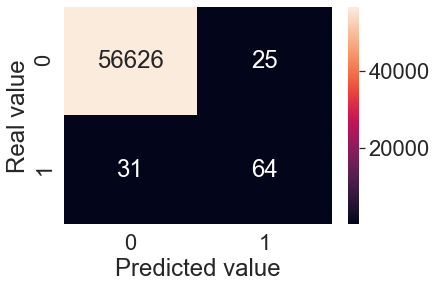

In [210]:
cm = metrics.confusion_matrix(y_test, y_pred_bcl1_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**b-with original data**

In [211]:
# Building the Bagging Classifier model
bcl.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the Bagging Classifier model
y_pred_bcl2 = bcl.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_bcl2)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_bcl2)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_bcl2)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_bcl2)))

F1 score: 0.713568
Accuracy: 0.998996
AUC: 0.873393
Precision: 0.682692


In [212]:
print(classification_report(y_test, y_pred_bcl2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.68      0.75      0.71        95

    accuracy                           1.00     56746
   macro avg       0.84      0.87      0.86     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

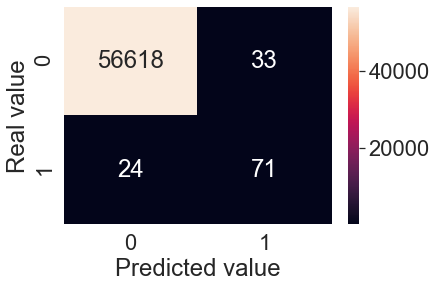

In [213]:
cm = metrics.confusion_matrix(y_test, y_pred_bcl2)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [214]:
# Building the Bagging Classifier model
grid_bcl.fit(X_train_smote2, y_train_smote2)
# Storing the predictions of the Bagging Classifier model
y_pred_bcl2_grid = grid_bcl.predict(X_test)
print("F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_bcl2_grid)))
print("Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_bcl2_grid)))
print("AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_bcl2_grid)))
print("Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_bcl2_grid)))

F1 score: 0.784530
Accuracy: 0.999313
AUC: 0.873552
Precision: 0.825581


In [217]:
print(classification_report(y_test, y_pred_bcl2_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.75      0.78        95

    accuracy                           1.00     56746
   macro avg       0.91      0.87      0.89     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 2.5, 'Predicted value')

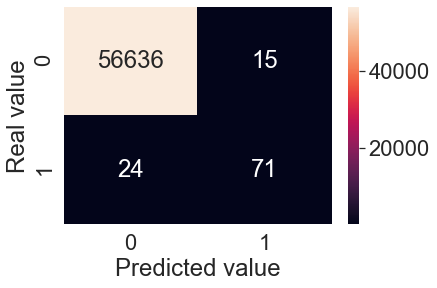

In [218]:
cm = metrics.confusion_matrix(y_test, y_pred_bcl2_grid)
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

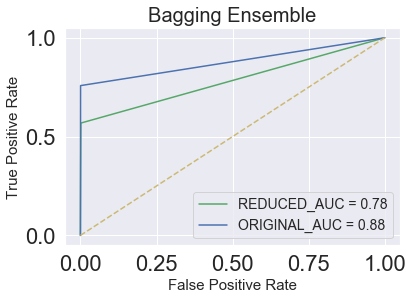

In [241]:
#----------Bagging Ensemble for Reduced data---------

fp_bcl1, tp_bcl1, threshold_bcl1 = metrics.roc_curve(y_test_encoded, y_pred_bcl1)
roc_auc_bcl1 = metrics.auc(fp_bcl1, tp_bcl1)
plt.plot(fp_bcl1, tp_bcl1, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_bcl1, color='g')

#----------Bagging Ensemble for Original data---------

fp_bcl2, tp_bcl2, threshold_bcl2 = metrics.roc_curve(y_test, y_pred_bcl2)
roc_auc_bcl2 = metrics.auc(fp_bcl2, tp_bcl2)
plt.plot(fp_bcl2, tp_bcl2, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_bcl2, color='b')

#----------Plotting both data---------

plt.title('Bagging Ensemble',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

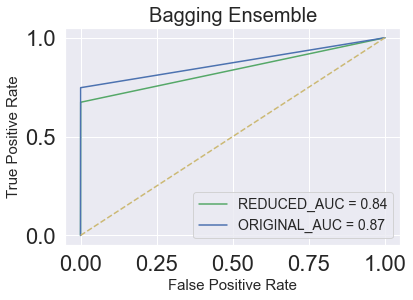

In [216]:
#----------Bagging Ensemble for Reduced data---------

fp_bcl1_grid, tp_bcl1_grid, threshold_bcl1_grid = metrics.roc_curve(y_test_encoded, y_pred_bcl1_grid)
roc_auc_bcl1_grid = metrics.auc(fp_bcl1_grid, tp_bcl1_grid)
plt.plot(fp_bcl1_grid, tp_bcl1_grid, 'b', label = 'REDUCED_AUC = %0.2f' % roc_auc_bcl1_grid, color='g')

#----------Bagging Ensemble for Original data---------

fp_bcl2_grid, tp_bcl2_grid, threshold_bcl2_grid = metrics.roc_curve(y_test, y_pred_bcl2_grid)
roc_auc_bcl2_grid = metrics.auc(fp_bcl2_grid, tp_bcl2_grid)
plt.plot(fp_bcl2_grid, tp_bcl2_grid, 'b', label = 'ORIGINAL_AUC = %0.2f' % roc_auc_bcl2_grid, color='b')

#----------Plotting both data---------

plt.title('Bagging Ensemble',fontsize=20)
plt.plot([0, 1], [0, 1],'y--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})